<a href="https://colab.research.google.com/github/Ilhammkt/Machine-Learning/blob/main/UAS/SVHN_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ilham Khodar Trijaya

NIM : 1103213084

Model : CNN The Street View House Numbers (SVHN) Dataset

# 1. Mengimpor Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.io import loadmat
import requests
import os
import random

# 2. Unduh dan Memuat Dataset

In [3]:
def download_svhn(url, filename):
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"{filename} already exists.")

# URL untuk file dataset
train_url = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'
test_url = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'

# Nama file untuk disimpan
train_filename = 'train_32x32.mat'
test_filename = 'test_32x32.mat'

# Unduh file
download_svhn(train_url, train_filename)
download_svhn(test_url, test_filename)

# Fungsi untuk memuat data
def load_data(file):
    data = loadmat(file)
    X = data['X']
    y = data['y']
    X = np.moveaxis(X, -1, 0)
    y[y == 10] = 0
    return X, y

# Memuat data training dan testing
X_train, y_train = load_data(train_filename)
X_test, y_test = load_data(test_filename)

Downloaded train_32x32.mat
Downloaded test_32x32.mat


# 3. Menggunakan Data Augmentation

In [4]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

# Fit the generator to the data
datagen.fit(X_train)

# 4. Preprocessing Data

In [5]:
# Normalisasi data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Konversi label ke bentuk one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 5. Membangun Arsitektur CNN

In [7]:
# Membangun model CNN yang lebih kompleks
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# 6. Melatih Model

In [9]:
# Melatih model dengan data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=15, # Meningkatkan jumlah epoch
                    validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train) // 64)

Epoch 1/15
1144/1144 [==============================] - 54s 47ms/step - loss: 0.6892 - accuracy: 0.7812 - val_loss: 0.3497 - val_accuracy: 0.9018
Epoch 2/15
1144/1144 [==============================] - 51s 44ms/step - loss: 0.5737 - accuracy: 0.8207 - val_loss: 0.2799 - val_accuracy: 0.9213
Epoch 3/15
1144/1144 [==============================] - 51s 45ms/step - loss: 0.5234 - accuracy: 0.8380 - val_loss: 0.2646 - val_accuracy: 0.9301
Epoch 4/15
1144/1144 [==============================] - 49s 43ms/step - loss: 0.4948 - accuracy: 0.8473 - val_loss: 0.2447 - val_accuracy: 0.9356
Epoch 5/15
1144/1144 [==============================] - 48s 42ms/step - loss: 0.4795 - accuracy: 0.8524 - val_loss: 0.2476 - val_accuracy: 0.9340
Epoch 6/15
1144/1144 [==============================] - 50s 43ms/step - loss: 0.4633 - accuracy: 0.8564 - val_loss: 0.2357 - val_accuracy: 0.9397
Epoch 7/15
1144/1144 [==============================] - 50s 44ms/step - loss: 0.4515 - accuracy: 0.8630 - val_loss: 0.2320 -

# 7. Evaluasi Model

814/814 [==============================] - 3s 4ms/step - loss: 0.2029 - accuracy: 0.9474
Test accuracy: 94.74%


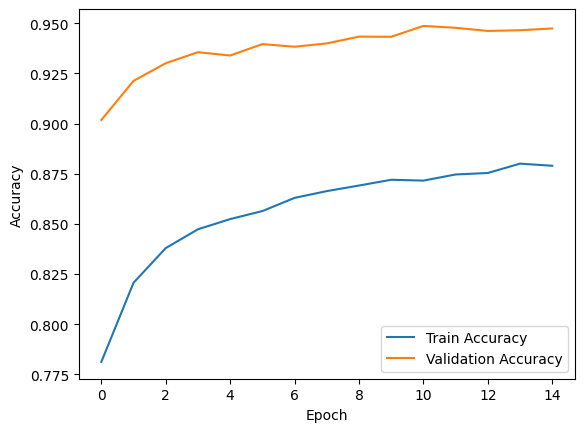

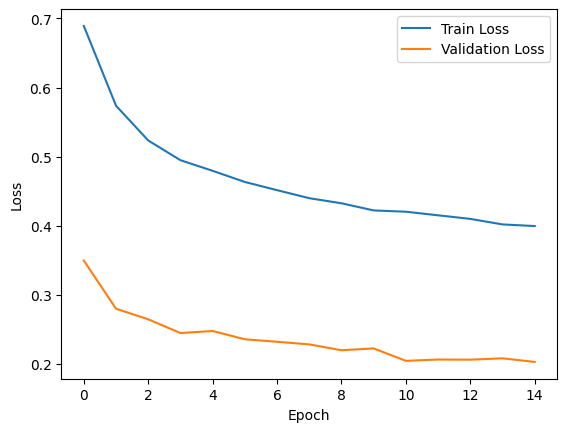

In [10]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Plot akurasi dan loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 8. Membuat Prediksi dan Visualisasi

814/814 [==============================] - 2s 2ms/step


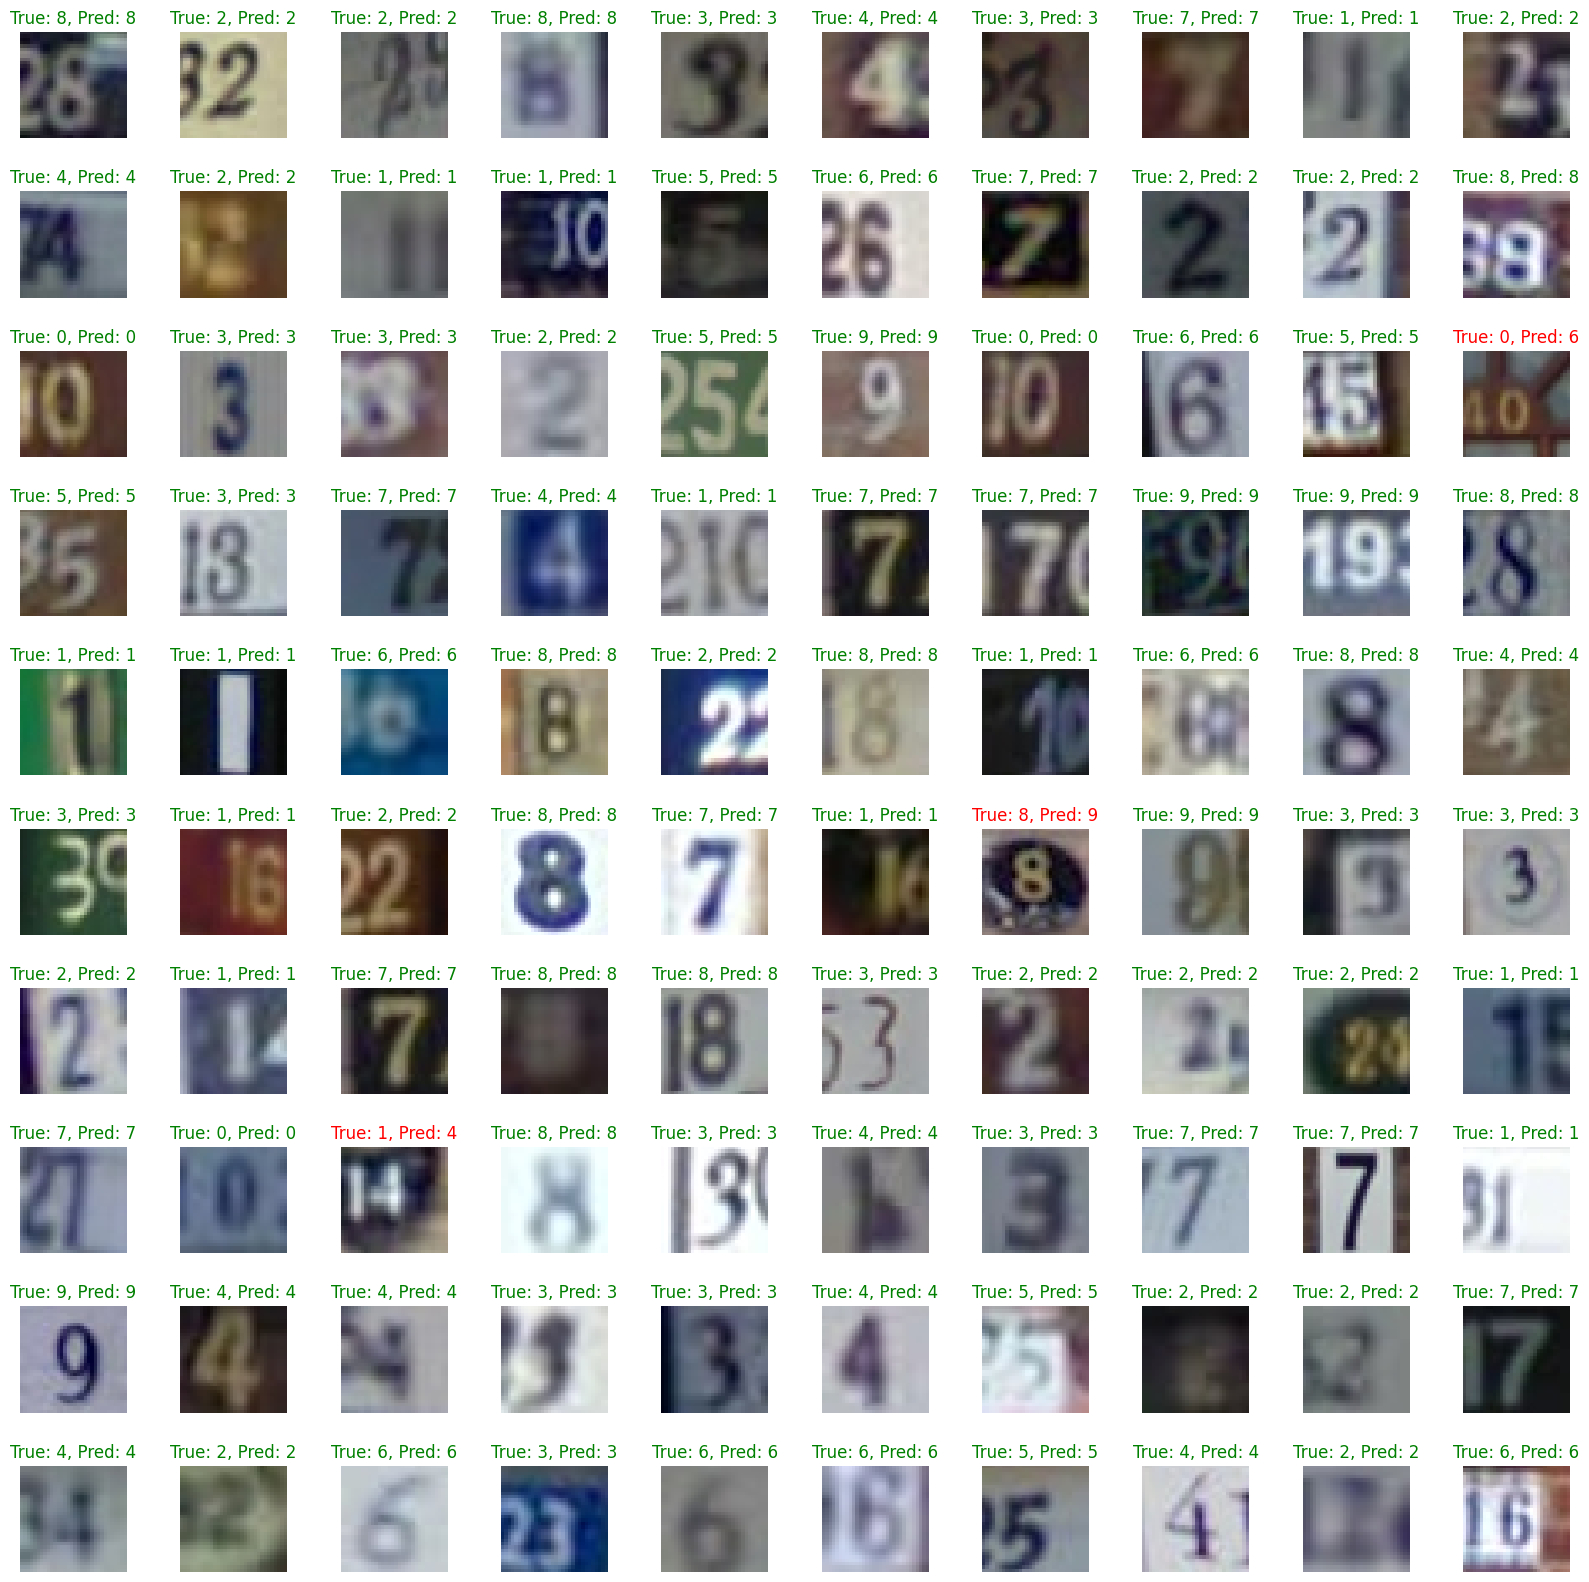

In [11]:
# Membuat prediksi pada dataset testing
predictions = model.predict(X_test)

# Fungsi untuk memvisualisasikan hasil prediksi dengan jarak antar gambar
def visualize_predictions(X, y_true, y_pred, rows=5, cols=5, wspace=0.5, hspace=0.5):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    num_images = rows * cols
    for i in range(num_images):
        index = random.randint(0, len(X) - 1)
        image = X[index]
        true_label = np.argmax(y_true[index])
        predicted_label = np.argmax(y_pred[index])
        ax = axes[i // cols, i % cols]
        ax.imshow(image)
        ax.set_title(f'True: {true_label}, Pred: {predicted_label}', color='green' if true_label == predicted_label else 'red')
        ax.axis('off')
    plt.show()

# Visualisasi beberapa hasil prediksi
visualize_predictions(X_test, y_test, predictions, rows=10, cols=10, wspace=0.5, hspace=0.5)